In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./icook_Description_TF-IDF.csv')

In [3]:
df_tfidf = df[['RecipeID','WordTFIDF']]

In [4]:
df_tfidf.head()

,RecipeID,WordTFIDF
0,170303.0,"['烤肉醬', '串燒', '幾種']"
1,169048.0,"['秋葵', '透抽', '烤味增']"
2,155271.0,"['沙嗲', '這可令', '接一串']"
3,90086.0,"['空腹', '甜柿', '霜降']"
4,337797.0,"['貨們', '韓式烤肉', '百吃']"


In [5]:
# 隨機抽取2000筆來跑模型
df_tfidf_sample = df_tfidf.sample(n=2000, random_state=1)

In [6]:
df_tfidf_sample.head()

,RecipeID,WordTFIDF
12836,99612.0,"['很合', '加在', '醃漬']"
25344,122786.0,"['飲食', '地中海', '健康']"
24622,122879.0,"['老胡', '生日', '烤雞']"
13383,319615.0,"['水等', '變點', '三分鐘']"
3543,336635.0,"['小管', '麵線', '最好']"


In [8]:
# 將每個食譜的特徵從 list轉成自串 並用空格隔開方便轉成向量
tmplist = []
for n, x in enumerate(df_tfidf_sample['WordTFIDF']):
    WordTFIDF_string = ' '.join(eval(x))
    tmplist.append(WordTFIDF_string)
tmplist[:5]

['很合 加在 醃漬', '飲食 地中海 健康', '老胡 生日 烤雞', '水等 變點 三分鐘', '小管 麵線 最好']

In [9]:
# 將所有食譜的特徵轉成向量
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(tmplist)

In [10]:
# 特徵數量
len(vectorizer.get_feature_names())

4322

In [11]:
# 查看feature array
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# 使用 K-means 將所有食譜的特徵向量分群
from sklearn.cluster import KMeans

# 決定分群數量
distortions = []

# 1. 測試從10~100群中找出誤差平方和 (SSE)最低
k_range = range(10,101,10)  # 分群從10開始分 每次跳10 最多到100群

for i in k_range:
    kmeans = KMeans(n_clusters=i).fit(X.toarray())
    distortions.append(kmeans.inertia_)

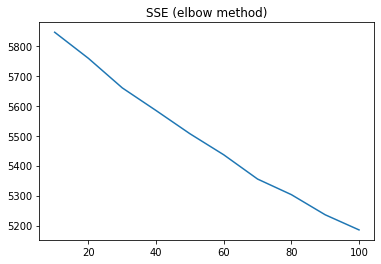

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

# 繪製誤差平方和圖
plt.title('SSE (elbow method)')
plt.plot(k_range, distortions)
plt.show()

    

In [115]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])